<a href="https://colab.research.google.com/github/hseyeon1006/ESAA_OB/blob/%ED%95%84%EC%82%AC/CH08_text_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#8. 텍스트 분석

##8.1. 텍스트 분석 이해

###텍스트 분석 수행 프로세스

1. 텍스트 사전 준비작업(텍스트 전처리) : 텍스트를 피처로 만들기 전에 미리 클렌징, 대/소문자 변경, 특수문자 삭제 등의 클렌징 작업, 단어 등의 토큰화 작업, 의미 없는 단어 제거 작업, 어근 추출 등의 텍스트 정규화 작업을 수행하는 것을 통칭함
2. 피처 벡터화/추출 : 사전 준비 작업으로 가공된 텍스트에서 피처를 추출하고 여기에 벡터값을 할당함. 대표적인 방법으로는 BOW, Word2Vec이 있으며 BOW는 대표적으로 count 기반과 TF-IDF 기반 벡터화가 있음
3. ML 모델 수립 및 학습/예측/평가 : 피처 벡터화된 데이터 세트에 ML 모델을 적용해 학습/예측 및 평가를 수행

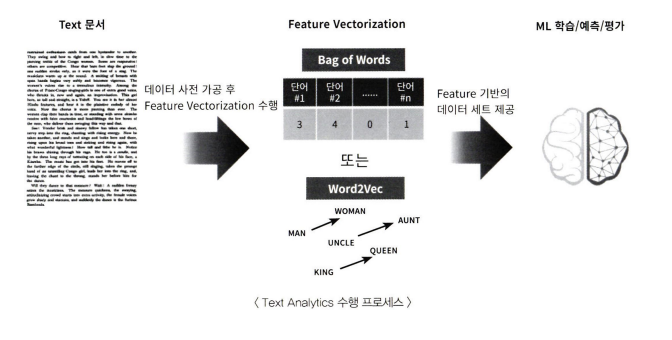

###파이썬 기반의 NLP, 텍스트 분석 패키지

* NLTK : 파이썬의 가장 대표적인 NLP 패키지. 방대한 데이터 세트와 서브 모듈을 가지고 있으며 NLP의 거의 모든 영역을 커버하고 있음. 많은 NLP 패키지가 NLTK의 영향을 받아 작성되고 있음. 수행 속도 측면에서 아쉬운 부분이 있어서 실제 대량의 데이터 기반에서는 제대로 활용되지 못하고 있음
* Gensim : 토픽 모델링 분야에서 가장 두각을 나타내는 패키지임. 오래전부터 토픽 모델링을 쉽게 구현할 수 있는 기능을 제공해왔으며, Word2Vec 구현 등의 다양한 신기능도 제공함. SpaCy와 함께 가장 많이 사용됨
* SpaCy : 뛰어난 수행 성능으로 최근 가장 주목 받음

##8.2. 텍스트 사전 준비 작업(텍스트 전처리) - 텍스트 정규화

* 클렌징 : 텍스트 분석에서 방해가 되는 불필요한 문자, 기호 등을 사전에 제거하는 작업
* 토큰화 : 문서에서 문장을 분리하는 문장 토큰화와 문장에서 단어를 토큰으로 분리하는 단어 토큰화가 있음

* 1) 문장 토큰화 : 문장의 마침표, 개행문자 등 문장의 마지막을 뜻하는 기호에 따라 분리하는 것이 일반적임
* 2) 단어 토큰화 : 공백, 콤마, 마침표, 개행문자 등으로 단어를 분리함
* 스톱 워드 제거 : 분석에 큰 의미가 없는 단어를 삭제하는 것(ex:is, the a, will)
* Stemming과 Lemmatization : 문법적 또는 의미적으로 변화하는 단어의 원형을 찾는 것

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#문장 토큰화
from nltk import sent_tokenize    # 문장 토큰화해주는 메서드
import nltk
nltk.download('punkt')

text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
You can see is out your window or on you television. \
You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample)
print(type(sentences), len(sentences))
print(sentences)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see is out your window or on you television.', 'You feel it when you go to work, or go to church or pay your taxes.']


-> sent_tokenize()가 반환하는 것은 각각의 문장으로 구성된 list 객체

In [3]:
#단어 토큰화
from nltk import word_tokenize    # 단어 토큰화해주는 메서드

sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


In [4]:
from nltk import word_tokenize, sent_tokenize

# 여러 개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화하게 만드는 함수 생성
def tokenize_text(text):

  # 문장별로 분리 토큰
  sentences = sent_tokenize(text)
  # 분리된 문장별 단어 토큰화
  word_tokens = [word_tokenize(sentence) for sentence in sentences]
  return word_tokens

# 여러 문장에 대해 문장별 단어 토큰화 수행.
word_tokens = tokenize_text(text_sample)
print(type(word_tokens), len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'is', 'out', 'your', 'window', 'or', 'on', 'you', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


-> 3개 문장을 문장별로 먼저 토큰화했으므로 word_tokens 변수는 3개의 리스트 객체를 내포하는 리스트임. 내포된 개별 리스트 객체는 각각 문장별로 토큰화된 단어를 요소로 가짐

In [5]:
#NLTK의 stopwords 목록 내려받기
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
#stopwords개수 확인하고 그 중에서 20개만 확인
print('영어 stop words 개수:', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 개수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [8]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens=[]
# 위 예제에서 3개의 문장별로 얻은 word_tokens list에 대해 스톱 워드를 제거하는 반복문
for sentence in word_tokens:
  filtered_words=[]
  # 개별 문장별로 토큰화된 문장 list에 대해 스톱 워드를 제거하는 반목문
  for word in sentence:
    # 소문자로 모두 변환합니다.
    word = word.lower()
    # 토큰화된 개별 단어가 스톱 워드의 단어에 포함되지 않으면 word_tokens에 추가
    if word not in stopwords:
      filtered_words.append(word)
  all_tokens.append(filtered_words)

print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


-> is, this와 같은 스톱 워드가 필터링을 통해 제거됨을 확인

In [9]:
#stemming
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'), stemmer.stem('works'), stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'), stemmer.stem('amused'))
print(stemmer.stem('happier'), stemmer.stem('happiest'))
print(stemmer.stem('fancier'), stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


In [10]:
#lemmatiazation
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing','v'), lemma.lemmatize('amuses','v'), lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'), lemma.lemmatize('happiset','a'))
print(lemma.lemmatize('fancier','a'), lemma.lemmatize('fanciest','a'))

[nltk_data] Downloading package wordnet to /root/nltk_data...


amuse amuse amuse
happy happiset
fancy fancy


##8.3. Bag of Words - BOW

문서가 가지는 모든 단어를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도값을 부여해 피처 값을 추출하는 모델

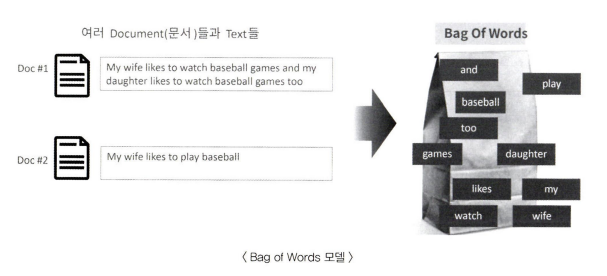

단점

1. 문맥 의미 반영 부족
2. 희소 행렬 문제

###BOW 피처 벡터화

* 피처 벡터화 : 각 문서의 텍스트를 단어로 추출해 피처로 할당하고, 각 단어의 발생 빈도와 같은 값을 이 피처에 값으로 부여해 각 문서를 이 단어 피처의 발생 빈도 값으로 구성된 벡터로 만드는 기법

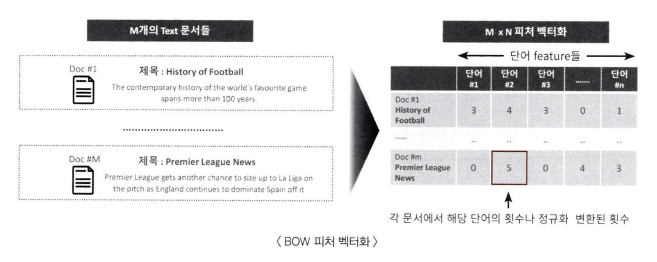

[방법]
1. 카운트 기반의 벡터화 : 단어 피처에 값을 부여할 때 각 문서에서 해당 단어가 나타나는 횟수를 부여하는 경우
2. TF-IDF 기반의 벡터화 : 개별 문서에서 자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 페널티를 주는 방식으로 값을 부여함

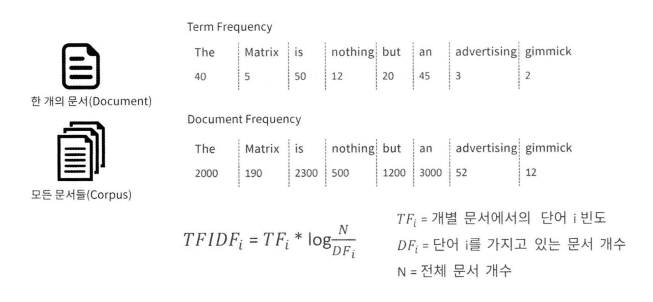

###사이킷런의 Count 및 TF-IDF 벡터화 구현 : CountVectorizer, TfidVectorizer

Countvectorizer의 파라미터

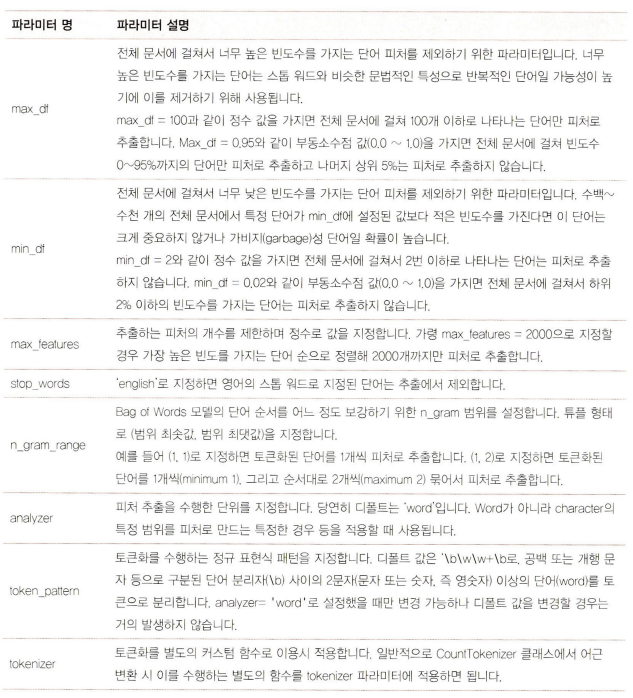



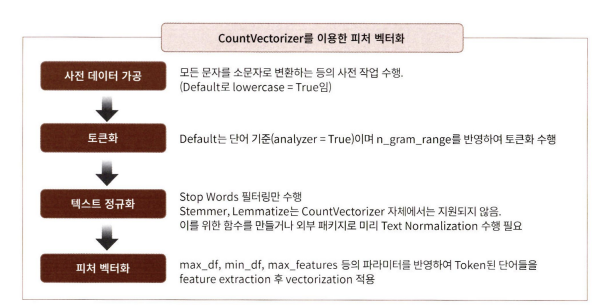

###BOW 벡터화를 위한 희소 행렬

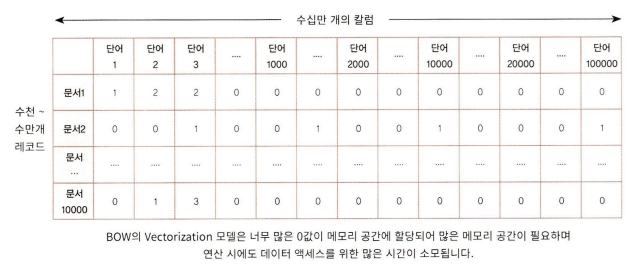

###희소 행렬 - COO 형식

0이 아닌 데이터만 별도의 데이터 배열에 저장하고, 그 데이터가 가리키는 행과 열의 위치를 별도의 배열로 저장하는 방식

In [11]:
#희소행렬 - COO 형식
import numpy as np
dense = np.array([[3,0,1],[0,2,0]])

In [12]:
from scipy import sparse

# 0이 아닌 데이터 추출
data = np.array([3,1,2])

# 행 위치와 열 위치를 각각 배열로 생성
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

# sparse 패키지의 coo_matrix를 이용해 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data,(row_pos, col_pos)))

sparse_coo는 COO 형식의 희소 행렬 객체 변수임

In [13]:
#밀집 형태의 행렬로 출력
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

###희소 행렬 - CSR 형식

COO 형식이 행과 열의 위치를 나타내기 위해서 반복적인 위치 데이터를 사용해야 하는 문제점을 해결한 방식

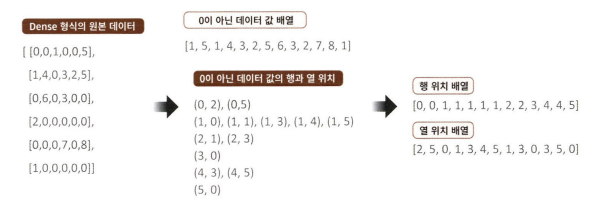

고유 값의 시작 위치만 알고 있으면 얼마든지 행 위치 배열을 다시 만들 수 있기에 COO 방식보다 메모리가 적게 들고 빠른 연산이 가능함

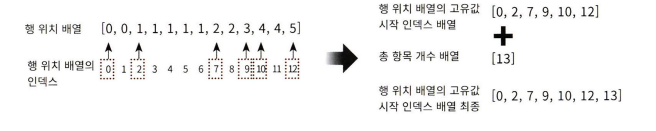

In [14]:
#희소행렬 - CSR형식
from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
                   [1,4,0,3,2,5],
                   [0,6,0,3,0,0],
                   [2,0,0,0,0,0],
                   [0,0,0,7,0,8],
                   [1,0,0,0,0,0]])

# 0이 아닌 데이터 추출
data2 = np.array([1,5,1,4,3,2,5,6,3,2,7,8,1])

# 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0,0,1,1,1,1,1,2,2,3,4,4,5])
col_pos = np.array([2,5,0,1,3,4,5,1,3,0,3,5,0])

# COO 형식으로 변환
sparse_coo = sparse.coo_matrix((data2, (row_pos, col_pos)))

# 행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0,2,7,9,10,12,13])

# CSR 형식으로 변환
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [15]:
#밀집 행렬을 생성 파라미터로 입력
dense3 = np.array([[0,0,1,0,0,5],
                   [1,4,0,3,2,5],
                   [0,6,0,3,0,0],
                   [2,0,0,0,0,0],
                   [0,0,0,7,0,8],
                   [1,0,0,0,0,0]])


coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)